In [2]:
import random
import os
import matplotlib.pyplot as plt
import networkx as nx
from pathlib import Path

%load_ext autoreload
%autoreload 2
from DQN.configuration_model import cm_model, get_degree_distribution

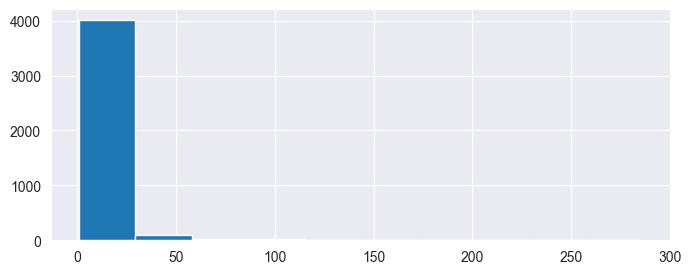

In [61]:
subdir = 'data/real/Cost'
file_name = "HI-II-14_degree.gml"
data_path = Path.cwd() / subdir
original_graph = nx.read_gml(data_path / file_name)
degrees = [original_graph.degree(n) for n in original_graph.nodes()]
plt.figure(figsize=(8,3))
plt.hist(degrees)
plt.show()

In [ ]:
# single graph generation via CM model
subdir = 'data/real/Cost'
file_name = "HI-II-14_degree.gml"
data_path = Path.cwd() / subdir / file_name

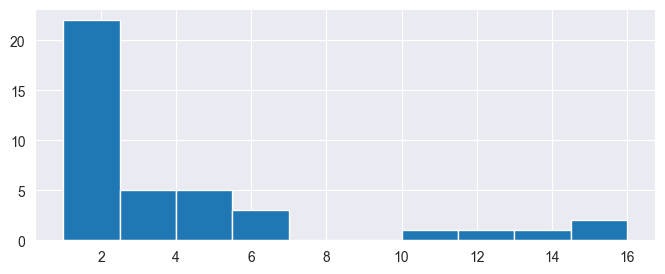

In [62]:

n_samples = 40
unique_degrees, cumulative_probs, degrees_original = get_degree_distribution(data_path)
G = cm_model(unique_degrees, cumulative_probs, degrees_original, n_samples)
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(8,3))
plt.hist(degrees)
plt.show()

In [10]:
subdir = 'data/real/Cost'
file_name = "WS_degree.gml"
data_path = Path.cwd() / subdir / file_name
unique_degrees, cumulative_probs, degrees_original = get_degree_distribution(data_path)

In [13]:
for i in range(2000):

    graph = cm_model(unique_degrees, cumulative_probs, degrees_original, random.randint(30,50))
    print(len(graph.nodes()))
    subdir = 'data/cm/WS_degree'
    file_name = f"g_{i}"
    file_path = Path.cwd()/subdir/file_name
    
    nx.write_gml(graph, file_path)

    print(f"Graph {i} saved to {file_path}")

45
Graph 0 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_0
43
Graph 1 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_1
50
Graph 2 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_2
45
Graph 3 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_3
31
Graph 4 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_4
39
Graph 5 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_5
46
Graph 6 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_6
49
Graph 7 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_7
40
Graph 8 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_8
44
Graph 9 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_9
50
Graph 10 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_10
38
Graph 11 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degree\g_11
43
Graph 12 saved to C:\rituja_git\ma-rituja-pardhi\DQN\data\cm\WS_degre

In [9]:
G = nx.connected_watts_strogatz_graph(500, k=8, p=0.1)
subdir = 'data/real/Cost'
file_name = 'WS_degree.gml'
file_path = Path.cwd()/subdir/file_name

degrees = dict(G.degree())
max_degree = max(degrees.values())
degree_weights = {int(node): degree / max_degree for node, degree in degrees.items()}
nx.set_node_attributes(G, degree_weights, 'weight')
nx.write_gml(G, file_path)